<a href="https://colab.research.google.com/github/minshyee/RecoSyS/blob/main/MF_RecomSYS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix Factorization(MF) 기반 추천

### 1. 추천의 알고리즘

|--|메모리 기반 알고리즘|모델 기반 알고리즘|
|---|---|---|
|설명|메모리에 있는 데이터를 계산해서 추천하는 방식(CF)|데이터로부터 미리 모델을 구성후 필요 시 추천하는 방식(MF, deep learning RECOM)| 
|특징|개별 사용자 데이터 집중|전체 사용자 패턴 집중 - weak signal를 더 잘 잡아낼 수 있음|
|장점|원래 데이터에 충실하게 사용 - 모든 데이터를 저장하고 있음| 대규모 데이터에 빠르게 반응 - 모델 훈련시에만 데이터 사용|
|단점|대규모 데이터에 느리게 반응, 연산 시간, 속도 느림|모델 생성 과정 오래 걸림|



### 2. Matrix Factorization
user x item (M x N)으로 구성된 평가 행렬을 두 개의 행렬로 분해하여 사용하는 방식이다.

- user latent matrix (M x k)</br>
  각 사용자의 특성을 나타내는 k개의 요인 값으로 이루어지 행렬
- item latent matrix (N x K)</br>
  각 사용자의 특성을 나타내는 k개의 요인 값으로 이루어지 행렬

여기서, k를 latent factor(잠재요인)이라 한다.</br>
 => 사용자와 아이템의 특성을 k개의 잠재요인을 사용하여 분석하는 모델이라고 말할 수 있다.

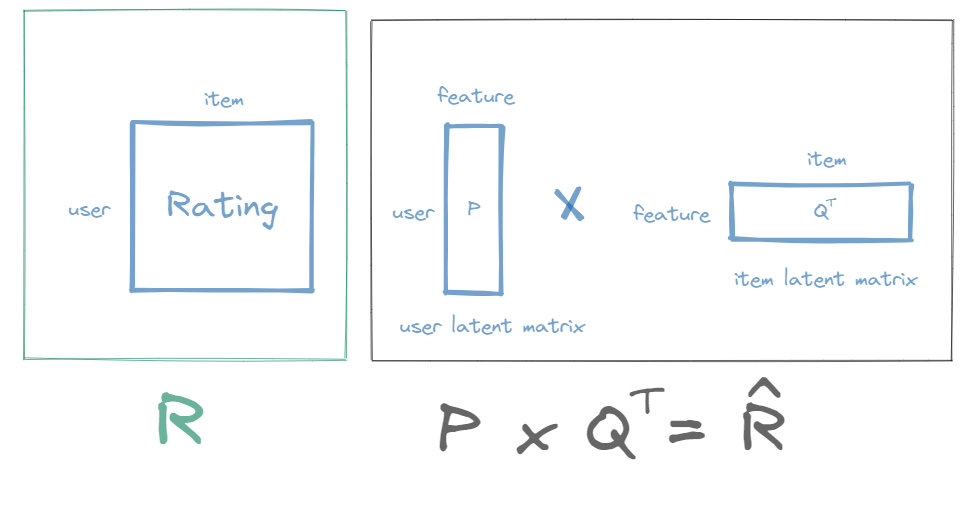

#### Example 

- user latent</br> 

|영화 \ 잠재요인| 액션 ~ 드라마 (-1 ~ 1) | 판타지 ~ 사실주의 (-1 ~ 1)|
|---|---|---|
|u1|0.2|-0.6|
|u2|0.64|-0.32|
|u3|-0.18|0.61|
|u4|-0.99|0.38|

- item latent</br> 

|영화 \ 잠재요인| 액션 ~ 드라마 (-1 ~ 1) | 판타지 ~ 사실주의 (-1 ~ 1)|
|---|---|---|
|m1|0.32|0.6|
|m2|0.61|-0.82|
|m3|-0.38|-0.61|
|m4|-0.79|0.08|


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

user = pd.DataFrame({'user':['u1','u2','u3','u4'], 'action-drama' : [0.2,0.64,-0.18,-0.99], 'fantasy-reality' : [-0.6,-0.32,0.61,0.38]})
item = pd.DataFrame({'item':['m1','m2','m3','m4'], 'action-drama' : [0.32,0.61,-0.38,-0.79], 'fantasy-reality' : [0.6,-0.82,-0.61,0.08]})

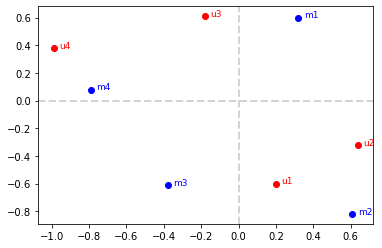

In [ ]:
plt.plot(user['action-drama'], user['fantasy-reality'],'ro')
for i, x in enumerate(user['action-drama']):
    plt.text(x+0.03, user['fantasy-reality'][i], user['user'][i],                 # 좌표 (x축 , y축 , 표시 text)
             fontsize = 9, 
             color='red')
plt.plot(item['action-drama'], item['fantasy-reality'],'bo')
for i, x in enumerate(item['action-drama']):
    plt.text(x+0.03, item['fantasy-reality'][i], item['item'][i],              
             fontsize = 9, 
             color='blue')
plt.axhline(0, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(0, color='lightgray', linestyle='--', linewidth=2)


In [ ]:
user.set_index('user')



,user,action-drama,fantasy-reality
0,u1,0.20,-0.60
1,u2,0.64,-0.32
2,u3,-0.18,0.61
3,u4,-0.99,0.38


In [ ]:
import numpy as np
pred_rating = np.dot(user.set_index('user'),item.set_index('item').T)
pred_rating

array([[-0.296 ,  0.614 ,  0.29  , -0.206 ],
       [ 0.0128,  0.6528, -0.048 , -0.5312],
       [ 0.3084, -0.61  , -0.3037,  0.191 ],
       [-0.0888, -0.9155,  0.1444,  0.8125]])

## SGD(Stochastic Gradient Descent)를 사용한 알고리즘

MF의 핵심 :주어진 사용자와 아이템의 관계를 잘 설명하는 P, Q 행렬을 분해 하는 것

### 1. MF 알고리즘의 개념적 설명
<center>
잠재요인 K선택</br>
⬇</br>
P, Q 행렬 초기화 </br>
⬇</br>
예측 평점 $\hat{R}$ 계산</br>
(P * Q.T) </br>
⬇</br>
실제 $R$ 과 $\hat{R}$ 간 오차 계산 및 P, Q 수정(이 때, SGD 사용) </br>
⬇</br>
기준 오차 도달 확인
</br></br>
기준 오차 도달 시 까지 아래 세 과정 반복
</center>



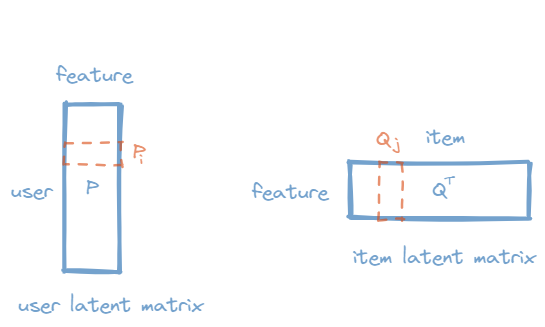

\begin{align}
  \hat{r_{ij}} = {p_i}^T{q_j} = \sum_{k=1}^K p_{ik}q_{kj} \\
  e_{ij} = (r_{ij} - \hat{r_{ij}})  \\
  e_{ij}^2 = (r_{ij} - \hat{r_{ij}})^2 = (r_{ij} - \sum_{k=1}^K p_{ik}q_{kj})^2 \\
  {\partial\over\partial q_{kj}}e_{ij}^2 = -2(r_{ij} - \hat{r_{ij}})(q_{kj}) = -2e_{ij}q_{kj} \\
  {\partial\over\partial p_{ik}}e_{ij}^2 = -2(r_{ij} - \hat{r_{ij}})(p_{ik}) = -2e_{ij}p_{ik} \\
  p_{ik}^\prime = p_{ik} - \alpha{\partial\over\partial p_{ik}}e_{ij}^2 = p_{ik} + 2\alpha e_{ij}q_{kj} \\
  q_{kj}^\prime = q_{kj} - \alpha{\partial\over\partial q_{kj}}e_{ij}^2 = q_{kj} + 2\alpha e_{ij}p_{ik}
\end{align}


\begin{align}
e_{ij}^2 = (r_{ij} - \sum_{k=1}^K p_{ik}q_{kj})^2 + {\beta\over 2}\sum_{k=1}^K({\lVert P \rVert}^2 + {\lVert Q \rVert}^2 ) \\
  p_{ik}^\prime = p_{ik} - \alpha{\partial\over\partial p_{ik}}e_{ij}^2 = p_{ik} + \alpha(2e_{ij}q_{kj}- \beta p_{ik}) \\
q_{kj}^\prime = q_{kj} - \alpha{\partial\over\partial q_{kj}}e_{ij}^2 = q_{kj} + \alpha(2e_{ij}q_{kj}- \beta q_{kj}) \\
\hat{r_{ij}} = b + bu_i + bd_j + \sum_{k=1}^Kp_{ik}q_{kj} \\
bu^\prime_i = bu_i + \alpha (e_{ij} - \beta bu_i) \\
bd^\prime_j = bd_j + \alpha (e_{ij} - \beta bd_j) \\
\end{align}

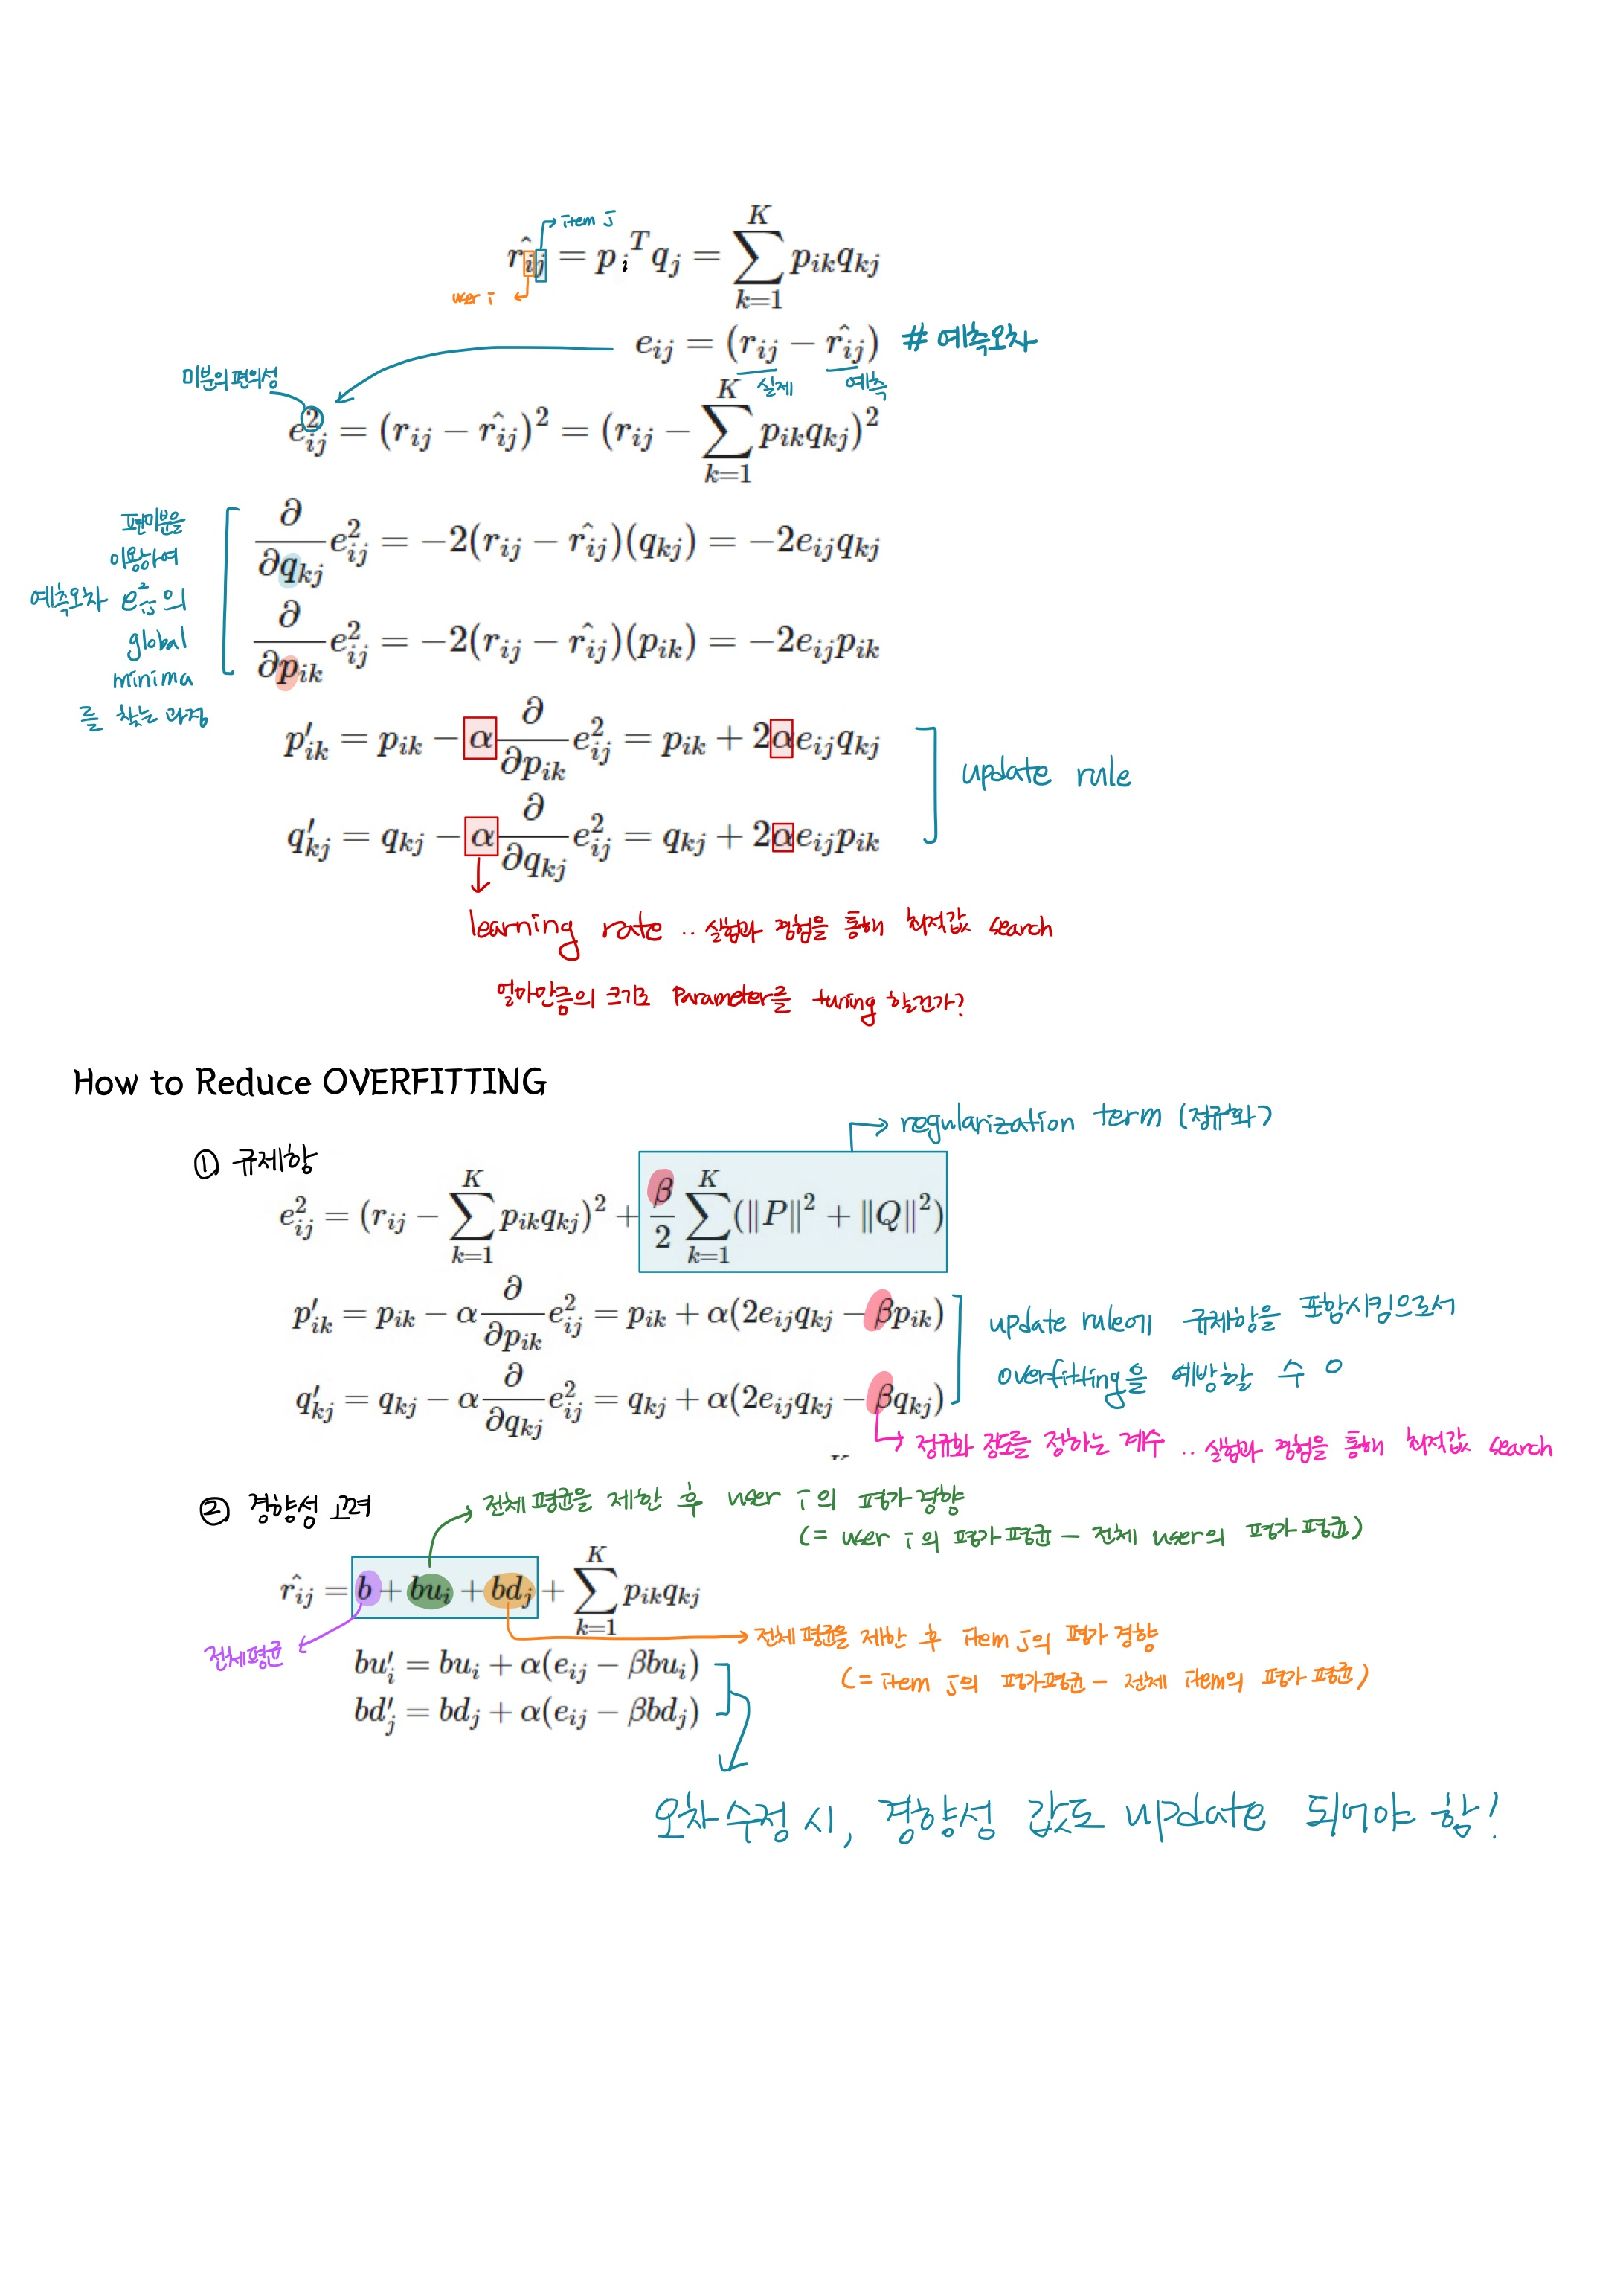

## 2. SGD를 사용한 MF 기본 알고리즘

In [ ]:
# mount

In [2]:
import os
import numpy as np
import pandas as pd

base_src = '/content/drive/MyDrive/Recosys/Data'

In [3]:
u_data_src = os.path.join(base_src, 'u.data')
r_cols = ['user_id','movie_id','rating','timestamp']

ratings = pd.read_csv(u_data_src,
                      sep='\t',
                      names=r_cols,
                      encoding='latin-1')

ratings = ratings[['user_id','movie_id','rating']].astype(int)

In [13]:
class MF():
  def __init__ (self, ratings, hyper_params):
    self.R = np.array(ratings) # df -> np.array
    self.num_users, self.num_items = np.shape(self.R)
    self.K = hyper_params['K']
    self.alpha = hyper_params['alpha'] # lr
    self.beta = hyper_params['beta'] # 규제항
    self.iterations= hyper_params['iterations'] # 반복회수
    self.verbose = hyper_params['verbose'] # 학습과정 출력 여부

  def rmse(self):
    xs, ys = self.R.nonzero() #0이 아닌 요소의 인덱스
    self.predictions = []
    self.errors = []

# 평점이 있는 요소 사용자와 아이템에 대해 각각 짝을 맞춰 for문으로 돌린다.
    for x,y in zip(xs, ys):
      prediction = self.get_predictions(x,y) # get prediction func
      self.predictions.append(prediction)
      self.errors.append(self.R[x,y] - prediction)
    self.predictions = np.array(self.predictions)
    self.errors = np.array(self.errors)

    return np.sqrt(np.mean(self.errors**2))

  def train(self):
    # 행렬 random 값으로 초기화
    self.P = np.random.normal(scale=1./self.K,
                              size=(self.num_users, self.K)) # mean : default=0, scale = 표준편차
    self.Q = np.random.normal(scale=1./self.K,
                              size=(self.num_items, self.K))
    #사용자 평가 경향 초기화
    self.b_u = np.zeros(self.num_users)
    self.b_d = np.zeros(self.num_items)
    self.b = np.mean(self.R[self.R.nonzero()]) # 평점의 전체 평균 

    
    rows, columns = self.R.nonzero() # 평점이 있는 요소의 인덱스만 가져옴
    self.samples = [(i,j,self.R[i,j]) for i, j in zip(rows,columns)] # SGD를 적용할 대상 

    training_process = [] # RMSE 기록

    for i in range(self.iterations): 
      np.random.shuffle(self.samples) # iteration 마다 다양한 시작점을 만들어 주기 위해
      self.sgd() 
      rmse = self.rmse()
      training_process.append((i+1, rmse)) # 몇 번째의 rmse인지(i+1)
      if self.verbose: 
        if (i+1) % 10 == 0: # 10회 마다 중간 결과 출력
          print('Iteration : %d =============>> train RMSE = %.4f'%(i+1, rmse))
    return training_process

  def get_predictions(self, i, j): 
    '''
    user i에 대한 item j의 평점 예측 값을 구하는 함수
    '''
    # 전체 평점 + user + item + user의 요인 값 + item 의 요인 값.T
    prediction = self.b + self.b_u[i] + self.b_d[j] + self.P[i,:].dot(self.Q[j,].T)
    return prediction

  def sgd(self): # 식 구현
    for i,j,r in self.samples:
      prediction = self.get_predictions(i,j)
      e = (r-prediction)

      self.b_u[i] += self.alpha * (e - (self.beta * self.b_u[i]))
      self.b_d[j] += self.alpha * (e - (self.beta * self.b_d[j]))

      self.P[i,:] += self.alpha * ((e * self.Q[j,:]) - (self.beta * self.P[i,:])) # *2를 뺴는 이유?
      self.Q[j,:] += self.alpha * ((e * self.P[i,:]) - (self.beta * self.Q[j,:]))

R_temp =  ratings.pivot(index='user_id',
                        columns='movie_id',
                        values='rating').fillna(0)

hyper_params = {'K' : 30,
                   'alpha' :0.001,
                   'beta' : 0.02,
                   'iterations' : 100,
                   'verbose' : True
}

mf = MF(R_temp, hyper_params)                                              

In [14]:
train_process = mf.train()

Iteration : 10 =============>> train RMSE = 0.9585
Iteration : 20 =============>> train RMSE = 0.9373
Iteration : 30 =============>> train RMSE = 0.9281
Iteration : 40 =============>> train RMSE = 0.9226
Iteration : 50 =============>> train RMSE = 0.9185
Iteration : 60 =============>> train RMSE = 0.9147
Iteration : 70 =============>> train RMSE = 0.9104
Iteration : 80 =============>> train RMSE = 0.9046
Iteration : 90 =============>> train RMSE = 0.8965
Iteration : 100 =============>> train RMSE = 0.8853
